# 범주형 데이터 이진분류 경진대회 탐색적 데이터 분석(EDA)

[범주형 데이터 이진분류 경진대회 링크](https://www.kaggle.com/c/cat-in-the-dat/)  
[EDA 노트북 참고 링크](https://www.kaggle.com/kabure/eda-feat-engineering-encode-conquer)

## 데이터 둘러보기

In [1]:
# ch4/categorical_feature_encoding_EDA.ipynb

import pandas as pd

train = pd.read_csv('/kaggle/input/cat-in-the-dat/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/cat-in-the-dat/test.csv', index_col='id')
submission = pd.read_csv('/kaggle/input/cat-in-the-dat/sample_submission.csv', index_col='id')

In [2]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [3]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


### 피처 요약표 만들기

#### 스텝 1 : 피처별 데이터 타입 DataFrame 생성 

In [5]:
summary = pd.DataFrame(train.dtypes, columns=['dtypes'])
summary.head()

,dtypes
bin_0,int64
bin_1,int64
bin_2,int64
bin_3,object
bin_4,object


#### 스텝 2 : 인덱스 재설정 후 열 이름 변경

In [6]:
summary = summary.reset_index()
summary.head()

,index,dtypes
0,bin_0,int64
1,bin_1,int64
2,bin_2,int64
3,bin_3,object
4,bin_4,object


In [7]:
summary = summary.rename(columns={'index': 'Feature'})
summary.head()

,Feature,dtypes
0,bin_0,int64
1,bin_1,int64
2,bin_2,int64
3,bin_3,object
4,bin_4,object


#### 스텝 3 : 결측값 개수, 고유값 개수, 1~3행 입력값 추가

In [8]:
summary['Missing'] = train.isnull().sum().values  
summary['Uniques'] = train.nunique().values
summary['First Value'] = train.loc[0].values
summary['Second Value'] = train.loc[1].values
summary['Third Value'] = train.loc[2].values
summary.head()

,Feature,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y


#### 전체 코드

In [9]:
# 스텝 1 : 피처별 데이터 타입 DataFrame 생성
summary = pd.DataFrame(train.dtypes, columns=['dtypes'])

# 스텝 2 : 인덱스 재설정 후 열 이름 변경
# 2.1 인덱스 재설정
summary = summary.reset_index()
# 2.2 열 이름 변경
summary = summary.rename(columns={'index': 'Feature'})

# 스텝 3 : 결측값 개수, 고유값 개수, 1~3행 입력값 추가
# 피처별 결측값 개수 ---①
summary['Missing'] = train.isnull().sum().values    
# 피처별 고유값 개수 ---②
summary['Uniques'] = train.nunique().values
# 1~3행에 입력되어 있는 값 ---③
summary['First Value'] = train.loc[0].values
summary['Second Value'] = train.loc[1].values
summary['Third Value'] = train.loc[2].values

In [10]:
summary

,Feature,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


#### ord_0, ord_1, ord_2 고유값

In [11]:
for i in range(3):
    col = 'ord_' + str(i)
    print(f'{col} 고유값: {train[col].unique()}')

ord_0 고유값: [2 1 3]
ord_1 고유값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고유값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


#### ord_3, ord_4, ord_5 고유값

In [12]:
for i in range(3, 6):
    col = 'ord_' + str(i)
    print(f'{col} 고유값: {train[col].unique()}')

ord_3 고유값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고유값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고유값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

#### 일, 월, 타깃값 고유값

In [13]:
print('day 고유값:', train['day'].unique())
print('month 고유값:', train['month'].unique())
print('target 고유값:', train['target'].unique())

day 고유값: [2 7 5 4 3 1 6]
month 고유값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고유값: [0 1]


## 데이터 시각화

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 타깃 값 분포

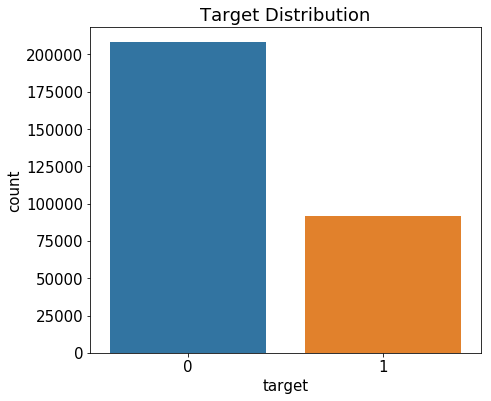

In [15]:
mpl.rc('font', size=15) # 폰트 크기 설정
plt.figure(figsize=(7, 6)) # Figure 크기 설정

# 타깃 값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set(title='Target Distribution');

![](http://)

In [16]:
rectangle = ax.patches[0] # 첫 번째 Rectangle 객체
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 208236
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [17]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + 1500)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 209736


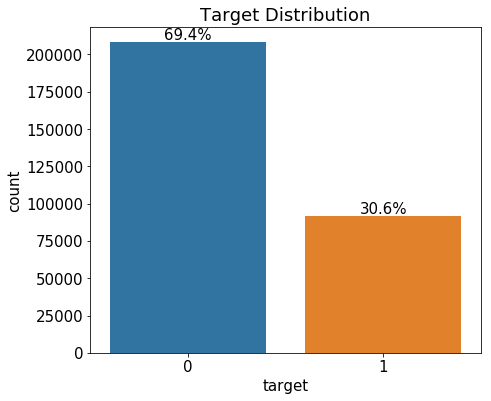

In [18]:
plt.figure(figsize=(7, 6))

# 타깃 값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)

total_size = len(train) # 훈련 데이터 전체 개수  

# 도형 객체를 순회하며, 막대 상단에 타깃 값 비율 표시 
for patch in ax.patches:
    height = patch.get_height() # 도형 높이 (데이터 개수)
    width = patch.get_width() # 도형 너비
    left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
    percent = height/total_size*100 # 타깃 값 비율
    
    # (x, y)좌표에 텍스트 입력 ---①
    ax.text(x=left_coord + width/2.0, # x축 위치
            y=height + 1500, # y축 위치
            s='{:1.1f}%'.format(percent), # 입력 텍스트
            ha='center') # 가운데 정렬

ax.set_title('Target Distribution');

### 이진 피처 분포

#### 스텝 1 : m행 n열 Figure 준비하기

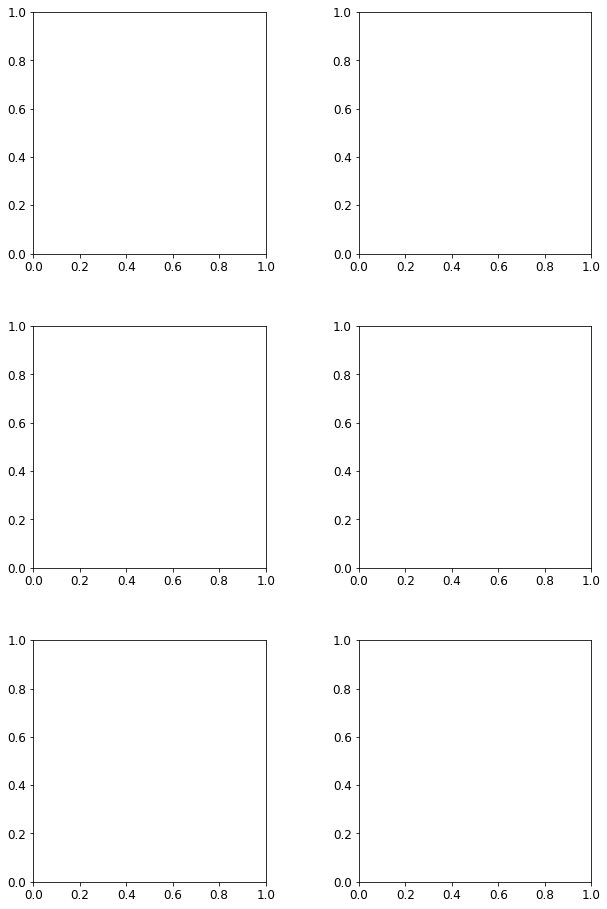

In [19]:
mpl.rc('font', size=12)
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
figure.set_size_inches(10, 16) # Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 여백 설정 ---①

#### 스텝 2 : 각 축에 서브플롯 할당

스텝 2-1 : 서브플롯 행과 열 위치를 구하는 함수 생성

In [20]:
def get_row_col_idx(idx):
    '''서브플롯의 행과 열 위치 반환'''
    row_idx = idx//2
    if idx%2 == 0:
        col_idx = 0
    else:
        col_idx = 1
    return row_idx, col_idx

스텝 2-2 : 이진 피처 리스트 할당

In [21]:
# 이진 피처 리스트
bin_cols = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

스텝 2-3 : 각 축에 서브플롯 할당

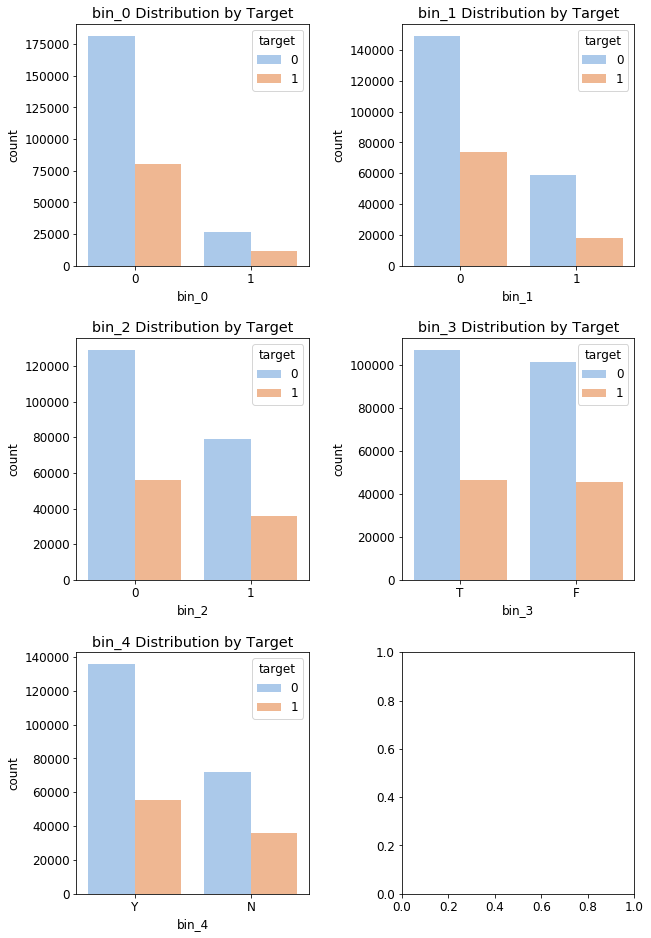

In [22]:
mpl.rc('font', size=12)
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 서브플롯 생성
figure.set_size_inches(10, 16) # Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 여백 설정

# 각 서브플롯에 타깃 값별 이진 피처 분포도 생성
for idx, col in enumerate(train[bin_cols]): 
    row_idx, col_idx = get_row_col_idx(idx) # 서브플롯 행, 열 위치 ---①
    ax = axes[row_idx, col_idx] # 그래프를 그릴 축 설정 ---②
    
    # 타깃 값 분포 카운트플롯
    sns.countplot(x=col, 
                  data=train, 
                  hue='target', 
                  palette='pastel', # 그래프 색상 설정
                  ax=ax) 
    
    ax.set_title(f'{col} Distribution by Target')

#### 스텝 3 : 그래프에 비율 표시

스텝 3-1 : 막대 그래프 상단에 타깃 값 비율을 표시하는 함수 생성

In [23]:
def write_percent(ax):
    '''막대 그래프 상단에 타깃 값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이 (데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃 값 비율
        
        # (x, y)좌표에 텍스트 입력
        ax.text(left_coord + width/2.0, # x축 위치
                height+500, # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center') # 가운데 정렬

스텝 3-2 : 비율을 표시한 타깃 값별 이진 피처 분포도 그리기

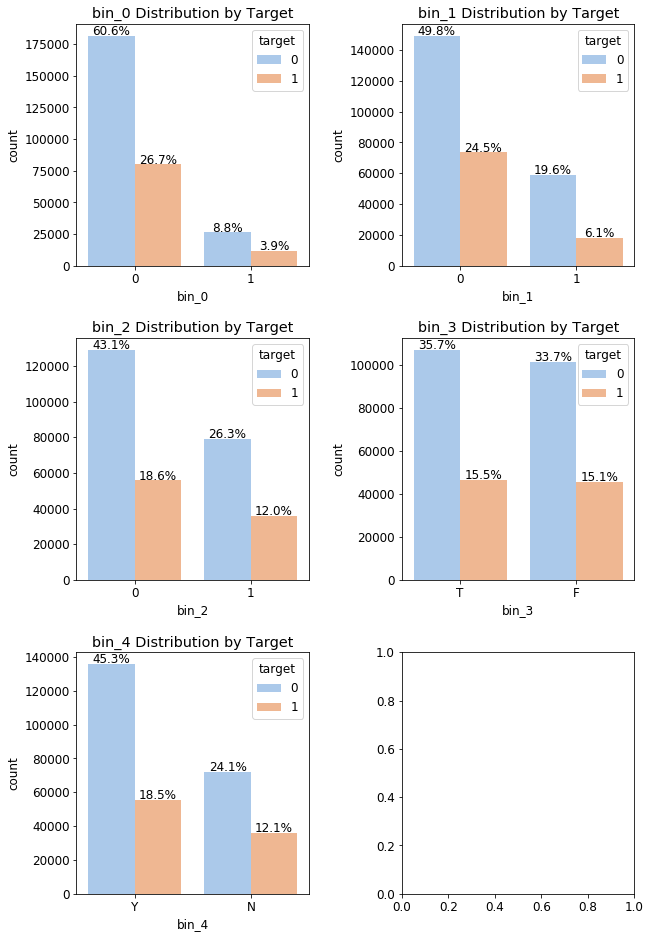

In [24]:
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 서브플롯 생성
figure.set_size_inches(10, 16) # Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 여백 설정

# 각 서브플롯에 타깃 값별 이진 피처 분포도 생성
for idx, col in enumerate(train[bin_cols]): 
    row_idx, col_idx = get_row_col_idx(idx) # 서브플롯 행, 열 위치
    ax = axes[row_idx, col_idx] # 그래프를 그릴 축 설정
    
    # 타깃 값 분포 카운트플롯
    sns.countplot(x=col, 
                  data=train, 
                  hue='target', 
                  palette='pastel', # 그래프 색상 설정
                  ax=ax) 
    
    write_percent(ax) # 비율 표시
    ax.set_title(f'{col} Distribution by Target')

### 명목형 피처 분포

#### 스텝 1: 교차분석표 생성 함수 만들기

In [25]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [26]:
pd.crosstab(train['nom_0'], train['target'], normalize='index')

target,0,1
nom_0,,
Blue,0.758210,0.241790
Green,0.672855,0.327145
Red,0.648948,0.351052


In [27]:
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [28]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

In [29]:
def get_crosstab(df, col):
    '''교차분석표 생성'''
    crosstab = pd.crosstab(df[col], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

#### 스텝 2: 포인트플롯 생성 함수 만들기

In [30]:
def plot_pointplot(ax, col, crosstab):
    '''공통 x축에 타깃 값 1 비율을 포인트플롯으로 그리기'''
    ax2 = ax.twinx() # 공통 x축 생성 ---①
    ax2 = sns.pointplot(x=col, y=1, data=crosstab,
                        order=crosstab[col].values, # 포인트플롯 순서
                        color='black', # 포인트플롯 색상
                        legend=False)
    ax2.set_ylim(crosstab[1].min()-5,crosstab[1].max()*1.1) # y축 범위 설정 ---②
    ax2.set_ylabel("Target 1 Ratio(%)")

#### 스텝 3: 피처 분포 및 피처별 타깃 값 1의 비율 포인트플롯 생성 함수 만들기

In [31]:
def plot_cat_dist_with_true_ratio(df, cols, num_rows, num_cols, size=(15, 20)):
    figure, axes = plt.subplots(nrows=num_rows, ncols=num_cols)
    figure.set_size_inches(size[0], size[1]) # 전체 Figure 크기 설정

    for idx, col in enumerate(df[cols]): 
        crosstab = get_crosstab(df, col) # 교차분석표 생성 ---①
        
        # 그래프를 그릴 축 지정 ---②
        if num_cols == 1:
            ax = axes[idx]
        elif num_cols == 2:
            row_idx, col_idx = get_row_col_idx(idx)
            ax = axes[row_idx, col_idx]
        else:
            raise Exception('num_cols에는 1 또는 2를 입력하세요.')
            
        sns.countplot(x=col, data=train, 
                      order=crosstab[col].values, 
                      color='skyblue', 
                      ax=ax) 

        write_percent(ax) # 고유값별 비율 표시
        
        plot_pointplot(ax, col, crosstab) # 포인트플롯 그리기
        
        ax.set_title(f'{col} Distribution') # 그래프 제목
        
    plt.subplots_adjust(hspace=0.3, wspace=0.45)

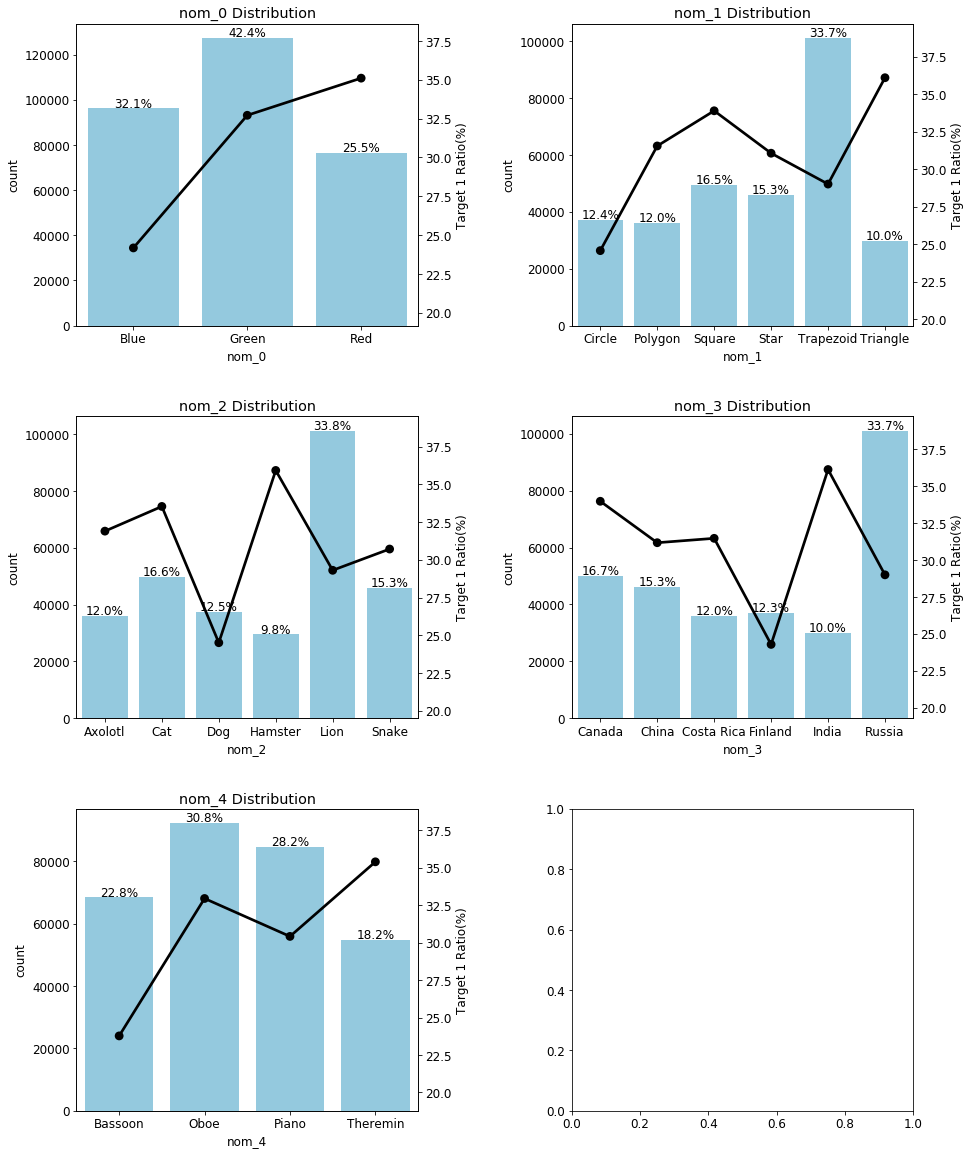

In [32]:
nom_cols = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_cols, num_rows=3, num_cols=2)

### 순서형 피처 분포

ord_0, ord_1, ord_2, ord_3 분포

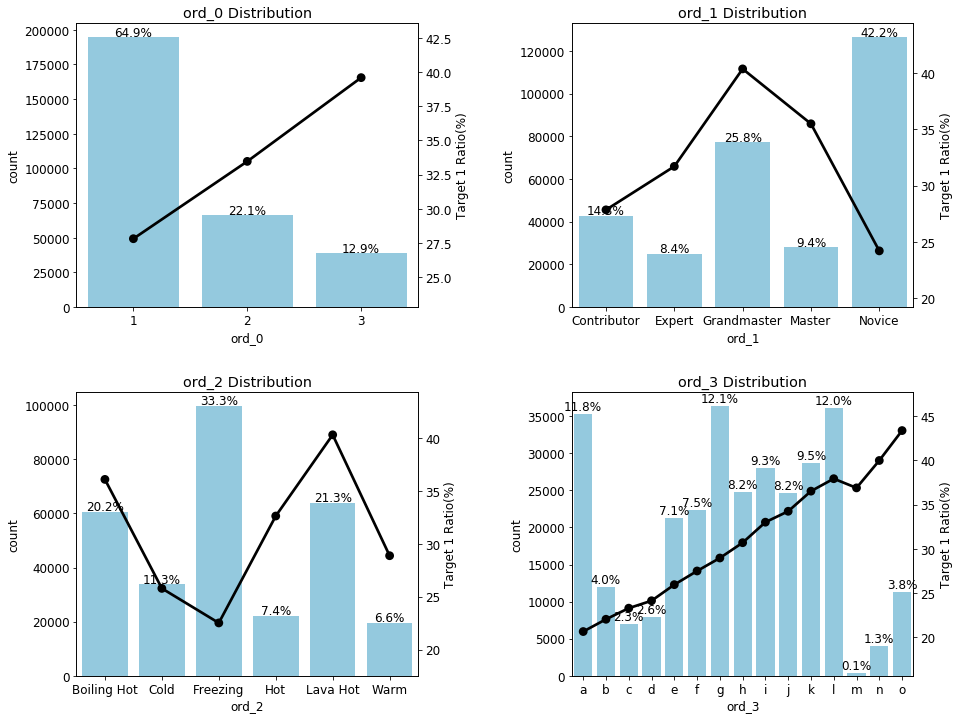

In [33]:
ord_cols = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_cols, 
                              num_rows=2, num_cols=2, size=(15, 12))

In [34]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

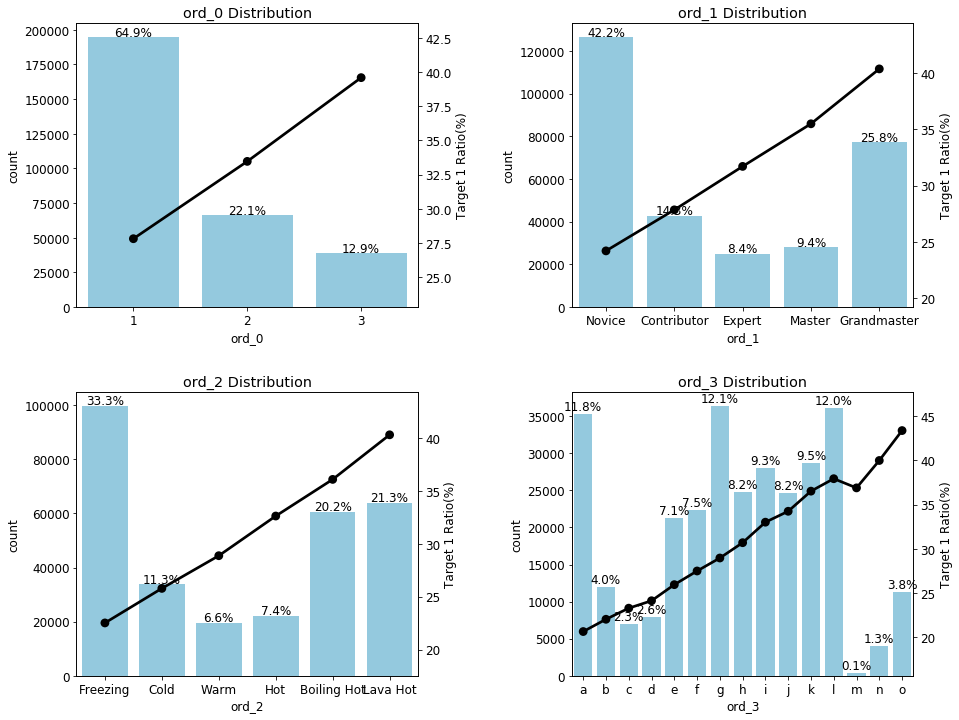

In [35]:
plot_cat_dist_with_true_ratio(train, ord_cols, num_rows=2, num_cols=2, size=(15, 12))

ord_4, ord_5 분포

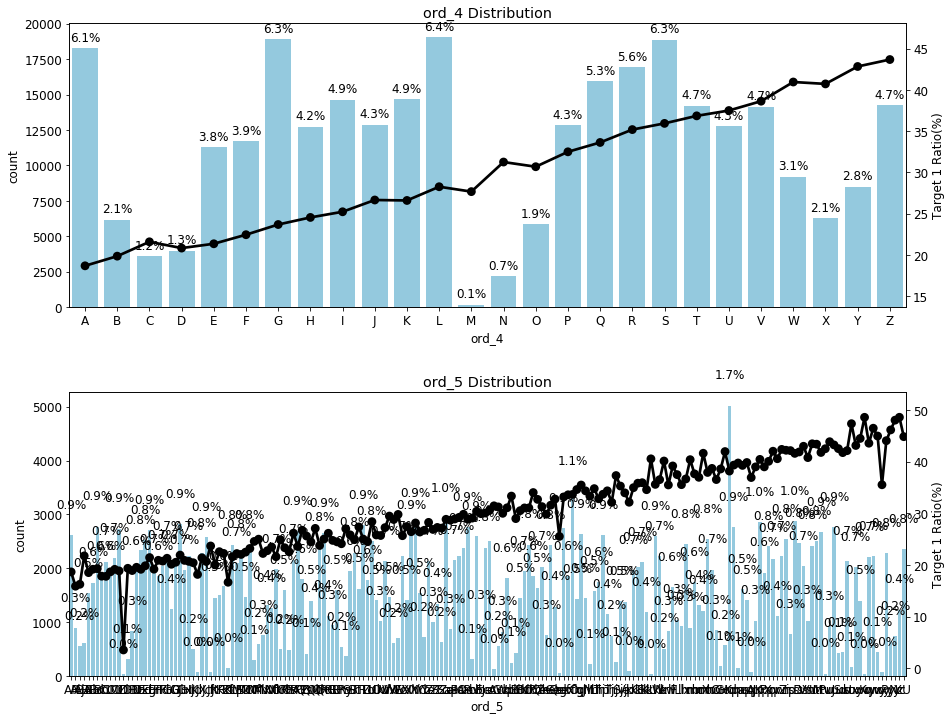

In [36]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                              num_rows=2, num_cols=1, size=(15, 12))

### 날짜 피처 분포

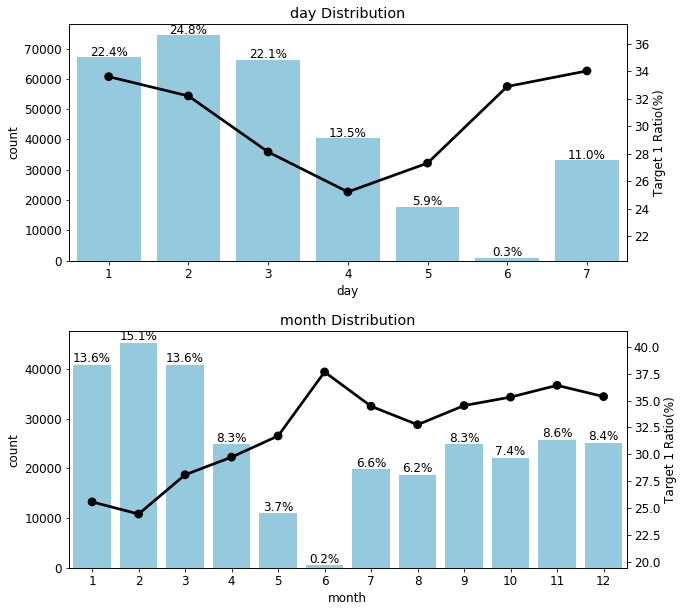

In [37]:
date_cols = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_cols, num_rows=2, num_cols=1, size=(10, 10))